archivo de parte[] grabado...


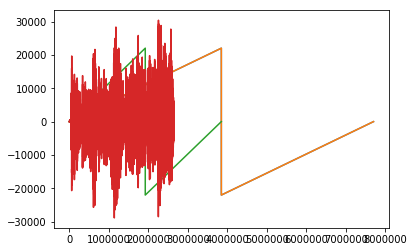

ValueError: x and y must have same first dimension, but have shapes (2645999,) and (2646000,)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as waves
# archivo = input('archivo de sonido:' )
archivo = 'Amigo.wav'
muestreo, sonido = waves.read(archivo)
# canales: monofónico o estéreo
tamano = np.shape(sonido)
muestras = tamano[0]
m = len(tamano)
canales = 1  # monofónico
if (m>1):  # estéreo
    canales = tamano[1]
# experimento con un canal
if (canales>1):
    canal = 0
    uncanal = sonido[:,canal] 
else:
    uncanal = sonido
signal=np.divide(sonido.T[0],2**16)
W=np.fft.fftfreq(int(signal.size/2),d=1/muestreo)

f_signal=np.fft.rfft(signal)
cut_f_signal = f_signal.copy()
for i in range(0,len(W)):
    if W[i]>250:
        cut_f_signal[i] = 0
    if W[i]<30:
        cut_f_signal[i] = 0
terminada = np.fft.irfft(cut_f_signal)
# rango de observación en segundos
inicia = 0
termina = 60
# observación en número de muestra
a = int(inicia*muestreo)
b = int(termina*muestreo)
parte = uncanal[a:b]
# Salida # Archivo de audio.wav
print('archivo de parte[] grabado...')
waves.write('parte03.wav', muestreo, terminada)
# Gráfica
plt.plot(parte)
plt.show()
# tiempos en eje x
dt = 1/muestreo
ta = a*dt
tb = (b-1)*dt
tab = np.arange(ta,tb,dt)

plt.plot(tab,parte)
plt.xlabel('tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

In [17]:
len(W)

3849216

In [18]:
len(cut_f_signal)

3849217